In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("../data/netflix_cleaned.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_7796\2726116536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type' , palette='Set2')


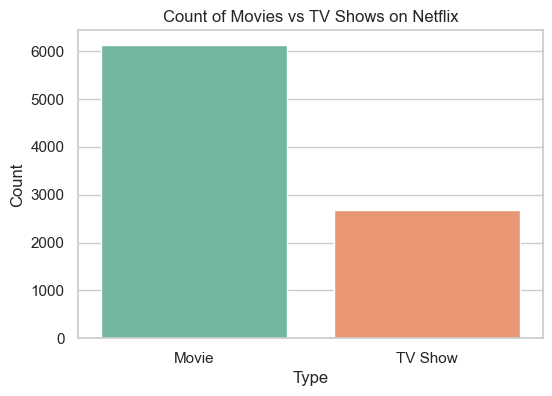

<Figure size 640x480 with 0 Axes>

In [3]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type' , palette='Set2')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

plt.savefig("../images/count-of-movies-and-tv-shows.png",dpi=300,bbox_inches='tight')

In [5]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

In [6]:
df[['date_added', 'year_added']].head()

,date_added,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0


In [7]:
df_year=df.dropna(subset=['year_added'])

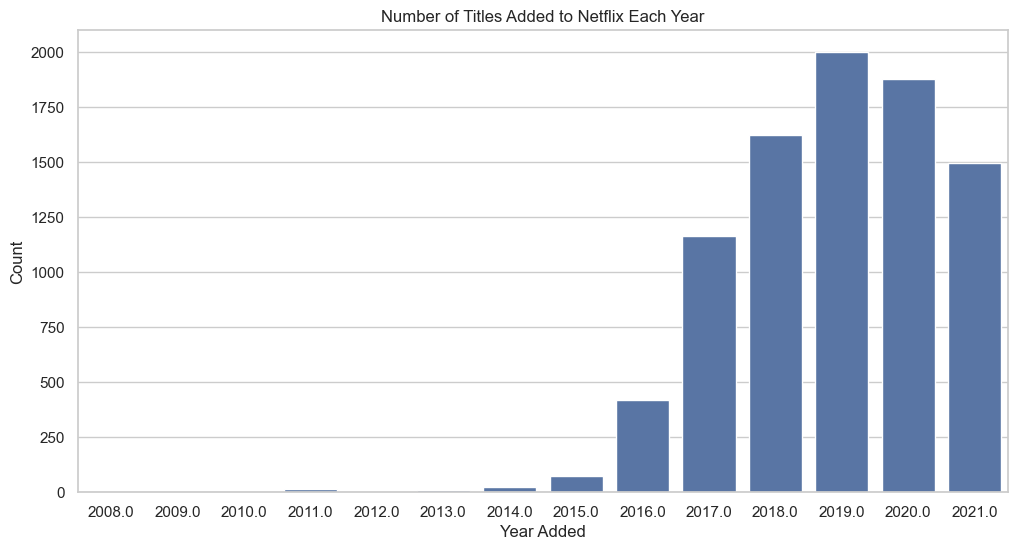

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_year, x= 'year_added')
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

plt.savefig("../images/added-titles-each-year.png",dpi=300,bbox_inches='tight')

In [9]:
df_genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
df_genres.name = 'genre'
genre_counts = df_genres.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
top10_genres = genre_counts.head(10)
top10_genres

,genre,count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


C:\Users\hp\AppData\Local\Temp\ipykernel_7796\3987049100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_genres, x='count', y='genre', palette='viridis')


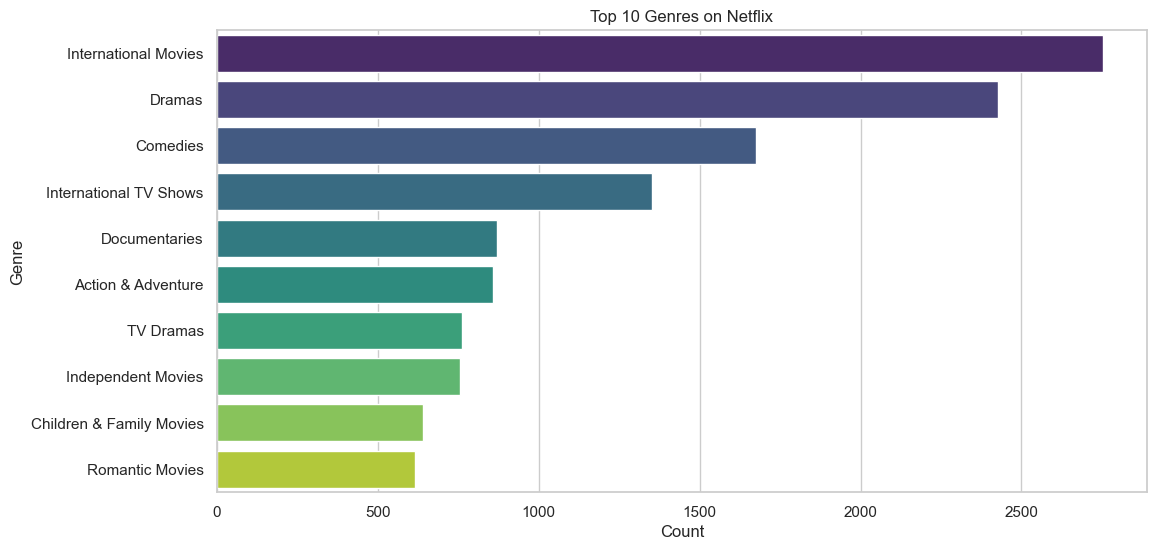

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_genres, x='count', y='genre', palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

plt.savefig("../images/top-10-genres.png",dpi=300,bbox_inches='tight')

In [11]:
df_countries = df['country'].str.split(', ', expand = True).stack().reset_index(level=1, drop=True)
df_countries.name = 'country'
country_counts = df_countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']
top10_countries = country_counts.head(10)
top10_countries 

,country,count
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


C:\Users\hp\AppData\Local\Temp\ipykernel_7796\2115375271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x='count', y='country', palette='magma')


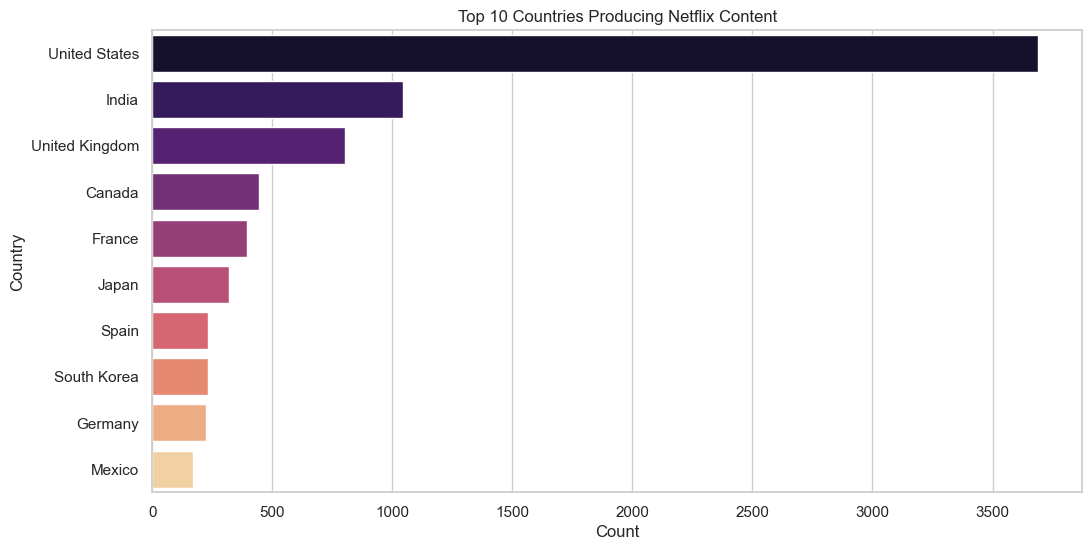

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_countries, x='count', y='country', palette='magma')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

plt.savefig("../images/top-10-countries-producers.png",dpi=300,bbox_inches='tight')

In [13]:
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']
rating_counts

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


C:\Users\hp\AppData\Local\Temp\ipykernel_7796\3612205655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_counts, x='rating', y='count', palette= 'coolwarm')


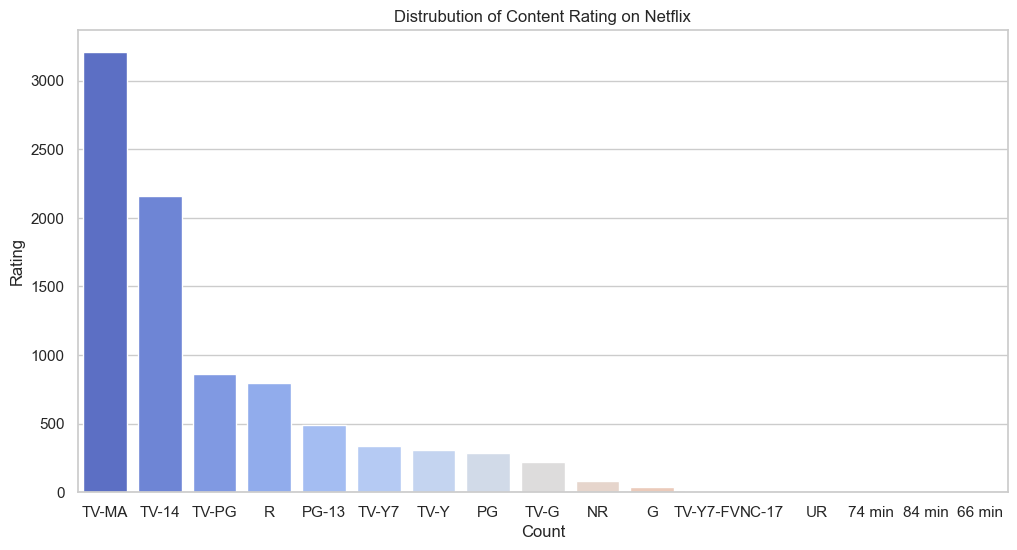

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=rating_counts, x='rating', y='count', palette= 'coolwarm')
plt.title("Distrubution of Content Rating on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

plt.savefig("../images/content-rating.png",dpi=300,bbox_inches='tight')

In [15]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df_year = df.dropna(subset=['year_added'])
trend = df_year.groupby(['year_added', 'type']).size().reset_index(name='count')
trend

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,4


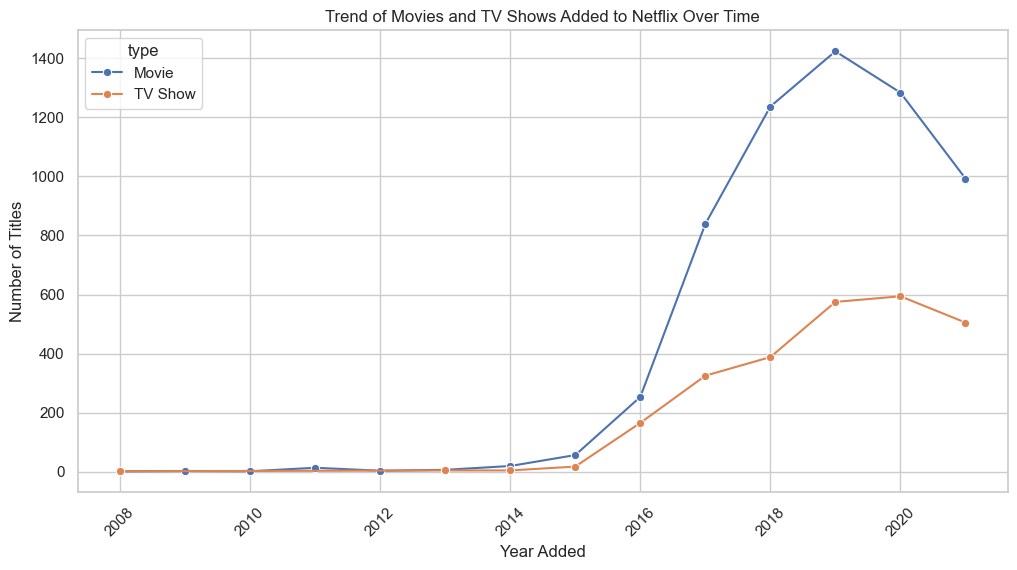

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=trend, x='year_added', y='count', hue='type', marker='o')
plt.title("Trend of Movies and TV Shows Added to Netflix Over Time")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# we have to types of viz lineplot and barplot


In [20]:
from wordcloud import WordCloud 

text = " ".join(str(desc) for desc in df['description'])

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='black',
    colormap='rainbow',
    stopwords=None
).generate(text)